## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [8]:
import os

In [9]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):


train = 'data/train'
val = 'data/val'
test = 'data/test'


# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 32

# Count number of images
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                count += 1
    return count

nb_train_samples = count_images(train)
nb_validation_samples = count_images(val)
nb_test_samples = count_images(test)

print(f"Train samples: {nb_train_samples}")
print(f"Validation samples: {nb_validation_samples}")
print(f"Test samples: {nb_test_samples}")

Train samples: 20000
Validation samples: 2490
Test samples: 2500


## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [10]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [11]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D((2,2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))


# 4:  +Pooling
model.add(MaxPooling2D((2,2)))

# 5:  +Convolutional
#     +Relu
model.add(Conv2D(64, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D((2,2)))

# 7:  +Flattening
model.add (Flatten())
# 8:  +Dense
#     +ReLu
model.add(Dense(64,activation="relu"))
# 9:  +Dropout
model.add (Dropout(0.5))
# 10: +Dense
#     +Sigmoid
model.add(Dense(1,activation="sigmoid"))


c:\Users\manis\anaconda3\envs\py312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

# If using Colab/Kaggle, check GPU
!nvidia-smi  # Run in Colab/Kaggle notebook

TensorFlow Version: 2.20.0
GPU Available: []
ERROR: Option # is not recognized. Please run 'nvidia-smi -h'.



In [14]:
print(train_generator.directory)


data/train


In [15]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [16]:
checkpoint_path = "training_1.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [19]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,verbose=1,
    callbacks=[cp_callback])
    

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.6176 - loss: 0.6464
Epoch 1: saving model to training_1.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 490s 782ms/step - accuracy: 0.6812 - loss: 0.5897 - val_accuracy: 0.7707 - val_loss: 0.4842
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7693 - loss: 0.4844
Epoch 2: saving model to training_1.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7742 - loss: 0.4794 - val_accuracy: 0.7898 - val_loss: 0.4559
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8073 - loss: 0.4274
Epoch 3: saving model to training_1.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.8099 - loss: 0.4205 - val_accuracy: 0.8101 - val_loss: 0.4050
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8443 - loss: 0.3619
Epoch 4: saving model to training_1.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8420 - loss: 0.3631 - val_accuracy: 0.7983 - va

In [20]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 654ms/step - accuracy: 0.8468 - loss: 0.4976
Test Loss: 0.4976103901863098
Test Accuracy: 0.8468000292778015


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

In [23]:
import matplotlib.pyplot as plt


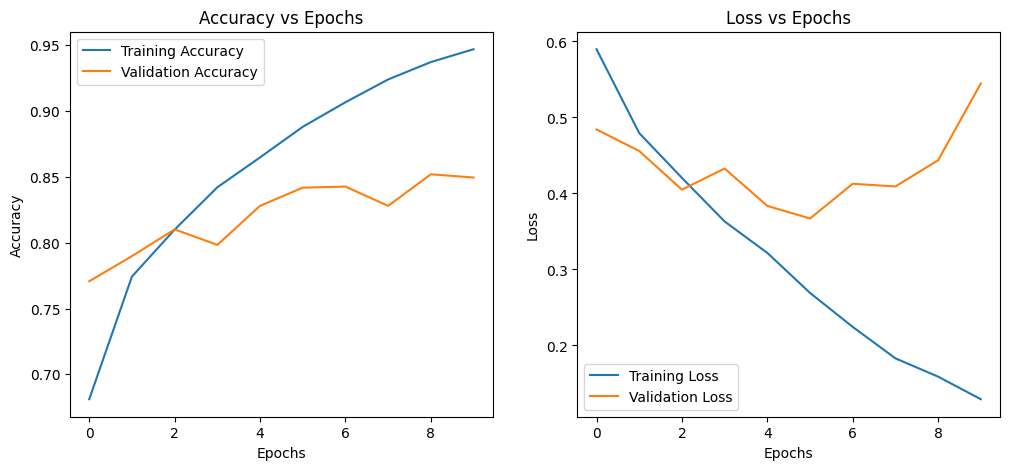

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


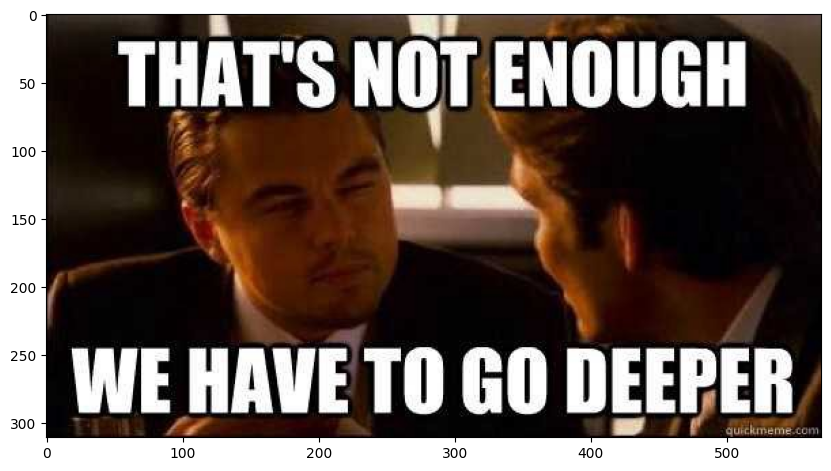

In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [26]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [28]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
# + ReLu
model.add(Dense(256, activation='relu'))
# + Dropout
model.add(Dropout(0.5))
# + Dense layer with 1 neuron
# + sigmoid
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

E.g., it was like:


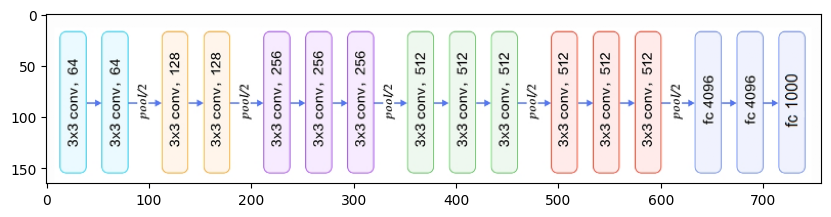

In [31]:
img = mpimg.imread('VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

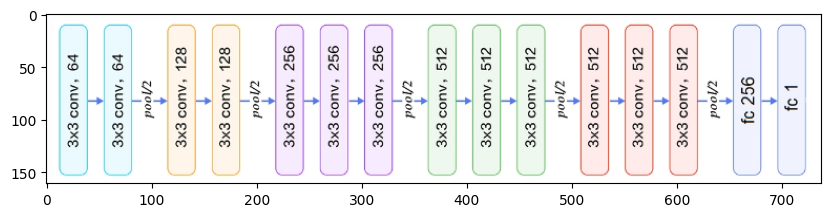

In [32]:
img = mpimg.imread('VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [33]:
checkpoint_path = "training_vgg16.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [34]:
cp_callback_vgg16 = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [35]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history_vgg16 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size, verbose=1,
    callbacks=[cp_callback])

Epoch 1/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.8390 - loss: 0.3730
Epoch 1: saving model to training_1.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 556s 887ms/step - accuracy: 0.8716 - loss: 0.3008 - val_accuracy: 0.9144 - val_loss: 0.2203
Epoch 2/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.9030 - loss: 0.2239
Epoch 2: saving model to training_1.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 561s 897ms/step - accuracy: 0.9032 - loss: 0.2281 - val_accuracy: 0.9188 - val_loss: 0.2178
Epoch 3/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.9122 - loss: 0.2125
Epoch 3: saving model to training_1.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 565s 905ms/step - accuracy: 0.9115 - loss: 0.2098 - val_accuracy: 0.9164 - val_loss: 0.2105
Epoch 4/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.9269 - loss: 0.1840
Epoch 4: saving model to training_1.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 900ms/step - accuracy: 0.9194 - loss: 0.1974 - val_accuracy: 0.

In [36]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


79/79 ━━━━━━━━━━━━━━━━━━━━ 57s 720ms/step - accuracy: 0.9084 - loss: 0.2430
Test Loss: 0.2430032193660736
Test Accuracy: 0.9083999991416931


## Part 3: Train your own classifier

In [37]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [38]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):


train = 'data/train'
val = 'data/val'
test = 'data/test'


# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 32

# Count number of images
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                count += 1
    return count

nb_train_samples = count_images(train)
nb_validation_samples = count_images(val)
nb_test_samples = count_images(test)

print(f"Train samples: {nb_train_samples}")
print(f"Validation samples: {nb_validation_samples}")
print(f"Test samples: {nb_test_samples}")

Train samples: 20000
Validation samples: 2490
Test samples: 2500


# Data Generators with Augmentation

In [39]:
IMG_SIZE = 150


In [40]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_directory(
    train,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# Create efficient B10 Model

In [41]:
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False   # freeze first phase


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Model definition

In [42]:
import tensorflow as tf


In [43]:

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(
    optimizer=Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [44]:
model.summary()



Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 150, 150,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 150, 150,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 150, 150,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 5,629,092 (21.47 MB)

 Trainable params: 1,576,961 (6.02 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [45]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]


In [48]:
!pip install scipy

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
    --------------------------------------- 0.5/38.6 MB 5.6 MB/s eta 0:00:07
   - -------------------------------------- 1.6/38.6 MB 4.2 MB/s eta 0:00:09
   --- ------------------------------------ 3.1/38.6 MB 5.6 MB/s eta 0:00:07
   ---- ----------------------------------- 4.7/38.6 MB 6.1 MB/s eta 0:00:06
   ------ --------------------------------- 6.3/38.6 MB 6.5 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/38.6 MB 6.8 MB/s eta 0:00:05
   ---------- ----------------------------- 10.0/38.6 MB 7.1 MB/s eta 0:00:05
   ----------- ---------------------------- 11.5/38.6 MB 7.2 MB/s eta 0:00:04
   ------------- -------------------------- 13.1/38.6 MB 7.2 MB/s eta 0:00:04
   --------------- ------------------------ 14.7/38.6 MB 7.2 MB/s eta 0:00:04
   ---------------- ----------------------- 16.3/38.6 MB 7.3 MB/s eta 0:00:04
   ------------------ --------------------- 17.8/38.6 MB 7.3 MB/s eta 0:00:03


In [49]:
history1 = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
    callbacks=callbacks, verbose =1
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 209s 320ms/step - accuracy: 0.9409 - loss: 0.1516 - val_accuracy: 0.9835 - val_loss: 0.0486 - learning_rate: 1.0000e-04
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accuracy: 0.9531 - loss: 0.1282 - val_accuracy: 0.9851 - val_loss: 0.0491 - learning_rate: 1.0000e-04
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 260ms/step - accuracy: 0.9593 - loss: 0.1067 - val_accuracy: 0.9871 - val_loss: 0.0402 - learning_rate: 1.0000e-04
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.9625 - loss: 0.0983 - val_accuracy: 0.9871 - val_loss: 0.0401 - learning_rate: 1.0000e-04
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.9625 - loss: 0.0967 - val_accuracy: 0.9863 - val_loss: 0.0404 - learning_rate: 1.0000e-04
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - accuracy: 0.9657 - loss: 0.0897 - val_accuracy: 0.9863 - val_loss: 0.0395 - learning_rate: 2.0000e-05
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 

In [50]:
test_loss, test_accuracy = model.evaluate(test_gen)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 349ms/step - accuracy: 0.9836 - loss: 0.0386
Test Loss: 0.038607001304626465
Test Accuracy: 0.9836000204086304


In [51]:
import matplotlib.pyplot as plt

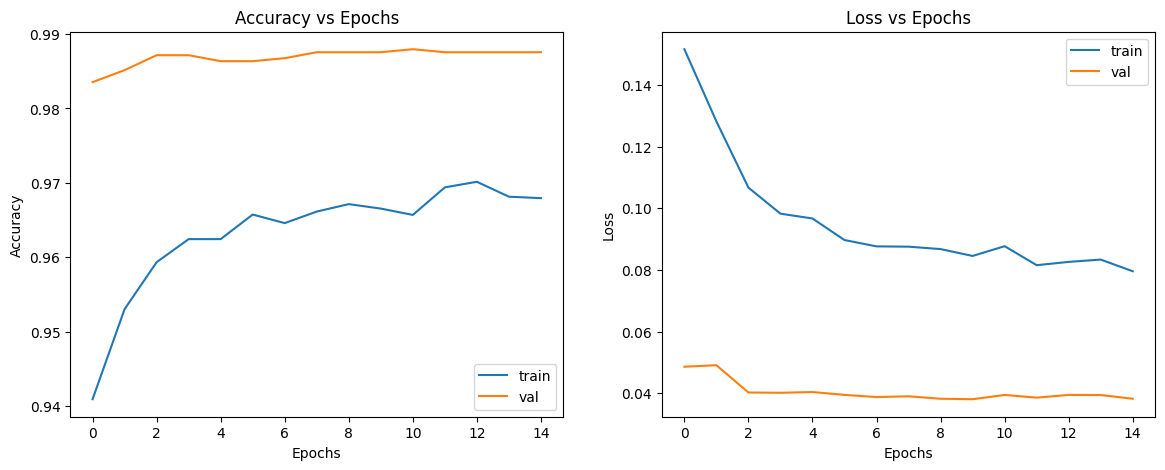

In [52]:
def plot_history(history):
    plt.figure(figsize=(14,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    
    plt.title('Accuracy vs Epochs')
    plt.legend(['train','val'])

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title('Loss vs Epochs')
    plt.legend(['train','val'])

    plt.show()

plot_history(history1)



 # Final Test Accuracy: 0.9836
 # Final Test Loss: 0.0386